In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [3]:
with open('data/census.pkl', 'rb') as f:
    X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = pickle.load(f)

In [4]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [5]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [10]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [11]:
previsoes = knn_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [12]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [13]:
accuracy_score(y_census_teste, previsoes)

0.8290685772773797

0.8290685772773797

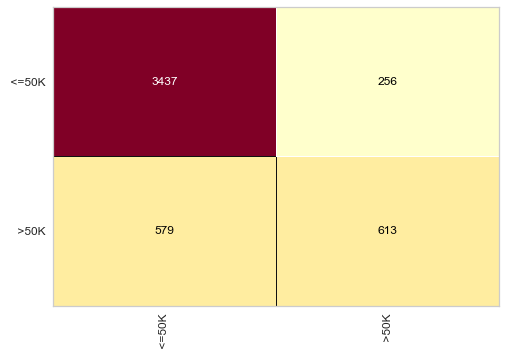

In [15]:
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [16]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885

